In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('50_Startups.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
data.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [7]:
data.nunique()

,0
R&D Spend,49
Administration,50
Marketing Spend,48
State,3
Profit,50


In [8]:
data.isnull().sum()

,0
R&D Spend,0
Administration,0
Marketing Spend,0
State,0
Profit,0


In [9]:
# prompt: i want a new  variable called total cost in that add R&D Spend,Administration,marketing spend .give cod efor that

data['Total Cost'] = data['R&D Spend'] + data['Administration'] + data['Marketing Spend']
print(data.head())


   R&D Spend  Administration  Marketing Spend       State     Profit  \
0  165349.20       136897.80        471784.10    New York  192261.83   
1  162597.70       151377.59        443898.53  California  191792.06   
2  153441.51       101145.55        407934.54     Florida  191050.39   
3  144372.41       118671.85        383199.62    New York  182901.99   
4  142107.34        91391.77        366168.42     Florida  166187.94   

   Total Cost  
0   774031.10  
1   757873.82  
2   662521.60  
3   646243.88  
4   599667.53  


In [10]:
data['Revenue'] = data['Total Cost'] + data['Profit']

In [11]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,Total Cost,Revenue
0,165349.20,136897.80,471784.10,New York,192261.83,774031.10,966292.93
1,162597.70,151377.59,443898.53,California,191792.06,757873.82,949665.88
2,153441.51,101145.55,407934.54,Florida,191050.39,662521.60,853571.99
3,144372.41,118671.85,383199.62,New York,182901.99,646243.88,829145.87
4,142107.34,91391.77,366168.42,Florida,166187.94,599667.53,765855.47


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("50_Startups.csv")  # Replace with your file path

# Display basic info
print(data.info())

# Summary statistics
print(data.describe())

# Check for null values
print(data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000

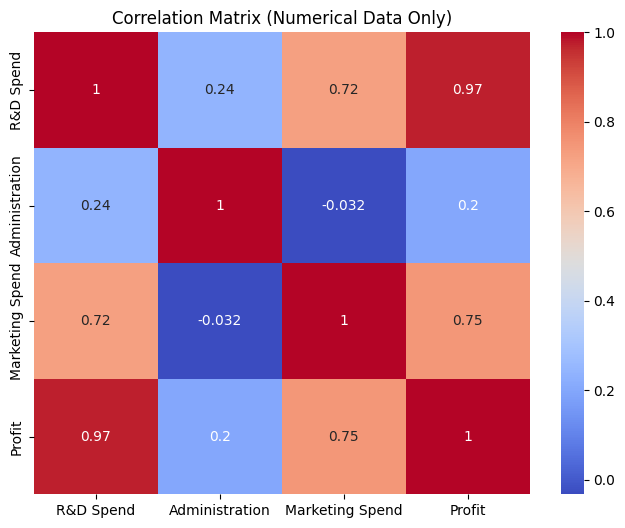

In [15]:
# Select only numerical columns
numerical_data = data.select_dtypes(include=["number"])

# Compute correlation matrix
correlation = numerical_data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Numerical Data Only)")
plt.show()


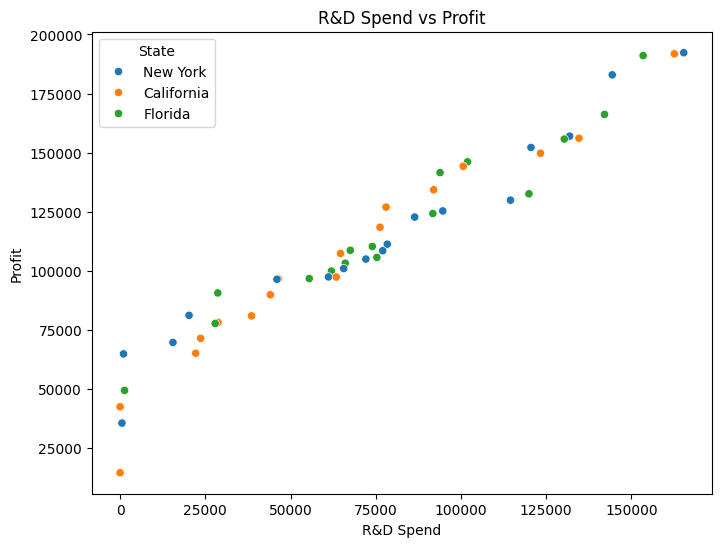

In [16]:
# Scatter plot for R&D Spend vs Profit
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="R&D Spend", y="Profit", hue="State")
plt.title("R&D Spend vs Profit")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.show()


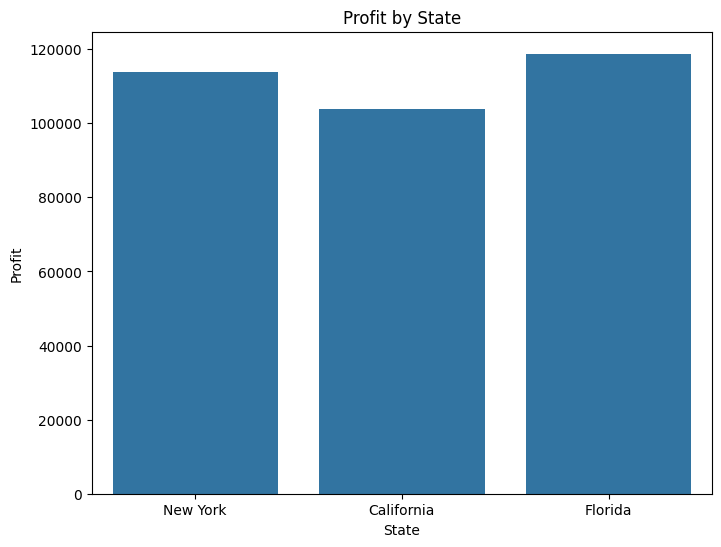

In [17]:
# Bar plot for Profit grouped by State
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x="State", y="Profit", ci=None)
plt.title("Profit by State")
plt.xlabel("State")
plt.ylabel("Profit")
plt.show()


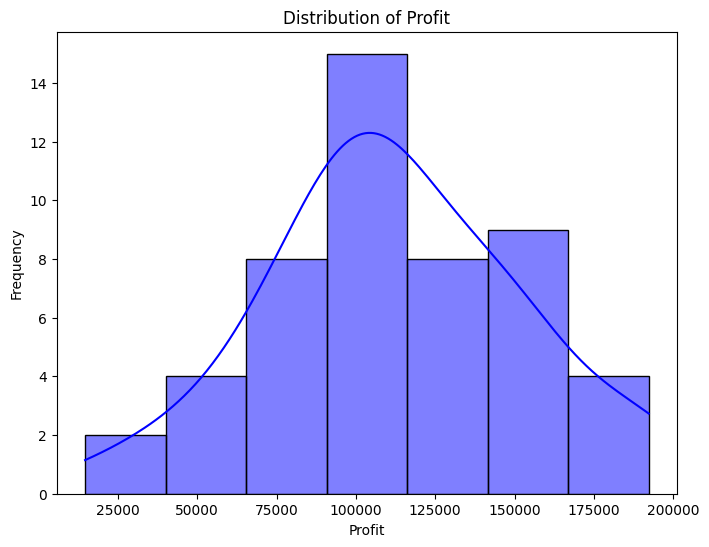

In [18]:
# Distribution plot for Profit
plt.figure(figsize=(8, 6))
sns.histplot(data["Profit"], kde=True, color="blue")
plt.title("Distribution of Profit")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()


In [21]:
mfrom sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = data[["R&D Spend", "Administration", "Marketing Spend"]]
y = data["Profit"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print(coefficients)


Mean Squared Error: 80926321.22295158
R-squared Score: 0.9000653083037321
                 Coefficient
R&D Spend           0.803779
Administration     -0.067929
Marketing Spend     0.031242


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features and target
X = data[["R&D Spend", "Administration", "Marketing Spend"]]  # Independent variables
y = data["Profit"]  # Dependent variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =======================================
# Multiple Linear Regression
# =======================================
model_multiple = LinearRegression()

# Train the model
model_multiple.fit(X_train, y_train)

# Make predictions
y_pred_multiple = model_multiple.predict(X_test)

# Calculate metrics
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

# Display results
print("\nMultiple Linear Regression")
print(f"  Mean Squared Error: {mse_multiple:.4f}")
print(f"  R² Score: {r2_multiple:.4f}")



Multiple Linear Regression
  Mean Squared Error: 80926321.2230
  R² Score: 0.9001


In [27]:
print(model_multiple.intercept_)

54071.87574599082


In [28]:
type(model_multiple)

sklearn.linear_model._base.LinearRegression

In [29]:
model_multiple.predict(X[0:5])

array([192416.0460853 , 188349.65891895, 183278.75349458, 174025.89464521,
       173526.31060596])

In [30]:
import pandas as pd
# Display the first few predictions alongside the actual values
predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_multiple})
print(predictions.head())

       Actual      Predicted
13  134307.35  126703.027165
39   81005.76   84894.750816
30   99937.59   98893.418160
45   64926.08   46501.708150
17  125370.37  129128.397344
